<a href="https://colab.research.google.com/github/Asif-Anwar-Sajid/Machine-Learning-Assignments/blob/main/2019831045_ML_Lab_Pneumonia_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import csv
from sklearn.model_selection import train_test_split

In [8]:
normal_images = os.listdir('/content/drive/MyDrive/X-Ray/train/NORMAL')
pneumonia_images = os.listdir('/content/drive/MyDrive/X-Ray/train/PNEUMONIA')

In [9]:
print('# of Normal images: ', len(normal_images))
print('# of Pneumonia images: ', len(pneumonia_images))

# of Normal images:  1358
# of Pneumonia images:  3875


In [10]:
Normal_label = [0]*len(normal_images)
Pneumonia_label = [1]*len(pneumonia_images)

All_labels = Normal_label + Pneumonia_label
print(len(Normal_label), len(Pneumonia_label), len(All_labels))

1358 3875 5233


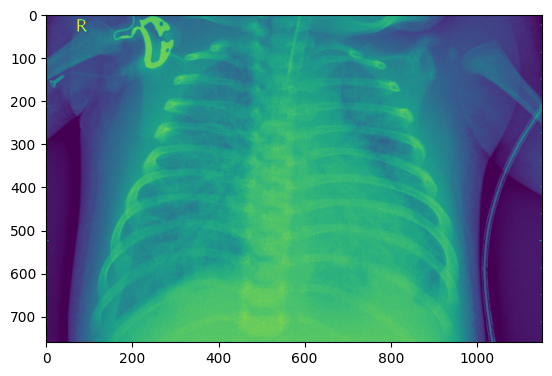

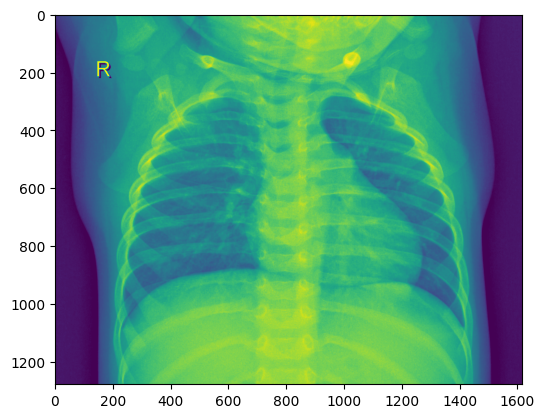

In [11]:
normal_image =  mpimg.imread(os.path.join('/content/drive/MyDrive/X-Ray/train/NORMAL','IM-0122-0001.jpeg'))
pneumonia_image = mpimg.imread(os.path.join('/content/drive/MyDrive/X-Ray/train/PNEUMONIA','person1000_bacteria_2931.jpeg'))


plt.imshow(pneumonia_image)
plt.show()
plt.imshow(normal_image)
plt.show()

In [12]:
data = []

for img_file in normal_images:
    image=Image.open('/content/drive/MyDrive/X-Ray/train/NORMAL'+'/'+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

for img_file in pneumonia_images:
    image=Image.open('/content/drive/MyDrive/X-Ray/train/PNEUMONIA'+'/' +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

type(data)
len(data)

5233

In [13]:
X_train = np.array(data)
Y_train = np.array(All_labels)

In [31]:
len(Y_train)

5233

In [14]:
X_train_scaled = X_train/255

In [15]:
normal_images = os.listdir('/content/drive/MyDrive/X-Ray/test/NORMAL')
pneumonia_images = os.listdir('/content/drive/MyDrive/X-Ray/test/PNEUMONIA')

print('# of Normal images: ', len(normal_images))
print('# of Pneumonia images: ', len(pneumonia_images))

# of Normal images:  234
# of Pneumonia images:  390


In [16]:
Normal_label = [0]*len(normal_images)
Pneumonia_label = [1]*len(pneumonia_images)

All_labels = Normal_label + Pneumonia_label
print(len(Normal_label), len(Pneumonia_label), len(All_labels))

234 390 624


In [17]:
data2 = []

for img_file in normal_images:
    image=Image.open('/content/drive/MyDrive/X-Ray/test/NORMAL'+'/'+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data2.append(image)

for img_file in pneumonia_images:
    image=Image.open('/content/drive/MyDrive/X-Ray/test/PNEUMONIA'+'/' +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data2.append(image)

type(data2)
len(data2)

624

In [18]:
X_test = np.array(data2)
Y_test = np.array(All_labels)

X_test_scaled = X_test/255

In [33]:
len(Y_test)

624

In [19]:
normal_images = os.listdir('/content/drive/MyDrive/X-Ray/val/NORMAL')
pneumonia_images = os.listdir('/content/drive/MyDrive/X-Ray/val/PNEUMONIA')

print('# of Normal images: ', len(normal_images))
print('# of Pneumonia images: ', len(pneumonia_images))

# of Normal images:  8
# of Pneumonia images:  8


In [34]:
Normal_label = [0]*len(normal_images)
Pneumonia_label = [1]*len(pneumonia_images)

All_labels = Normal_label + Pneumonia_label
print(len(Normal_label), len(Pneumonia_label), len(All_labels))

8 8 16


In [35]:
data3 = []

for img_file in normal_images:
    image=Image.open('/content/drive/MyDrive/X-Ray/val/NORMAL'+'/'+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data3.append(image)

for img_file in pneumonia_images:
    image=Image.open('/content/drive/MyDrive/X-Ray/val/PNEUMONIA'+'/' +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data3.append(image)

type(data3)
len(data3)

16

In [36]:
X_val = np.array(data3)
Y_val = np.array(All_labels)

X_val_scaled = X_val/255

In [37]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(no_of_classes, activation = 'softmax'))


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      3136      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 41, 41, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 39, 39, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 128)        

In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [42]:
history = model.fit(
    X_train_scaled,
    Y_train,
    verbose=1,
    validation_data = (X_val_scaled, Y_val),
    epochs=5
)

Epoch 1/5
164/164 [==============================] - 183s 1s/step - loss: 0.2594 - accuracy: 0.8842 - val_loss: 0.4431 - val_accuracy: 0.8125
Epoch 2/5
164/164 [==============================] - 182s 1s/step - loss: 0.1345 - accuracy: 0.9530 - val_loss: 0.1580 - val_accuracy: 0.9375
Epoch 3/5
164/164 [==============================] - 183s 1s/step - loss: 0.1019 - accuracy: 0.9631 - val_loss: 0.1993 - val_accuracy: 0.8750
Epoch 4/5
164/164 [==============================] - 188s 1s/step - loss: 0.0941 - accuracy: 0.9687 - val_loss: 0.3251 - val_accuracy: 0.8125
Epoch 5/5
164/164 [==============================] - 182s 1s/step - loss: 0.0771 - accuracy: 0.9723 - val_loss: 0.1884 - val_accuracy: 0.8750


In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

20/20 [==============================] - 6s 294ms/step - loss: 1.1082 - accuracy: 0.7452


In [56]:
Y_predicted_probabilities = model.predict(X_test_scaled)

Y_predicted = np.argmax(Y_predicted_probabilities, axis=1)

20/20 [==============================] - 8s 383ms/step


In [57]:
print(Y_predicted[0])

1


In [70]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, classification_report

In [71]:
# Calculate metrics
accuracy = accuracy_score(Y_test, Y_predicted)
precision = precision_score(Y_test, Y_predicted)
recall = recall_score(Y_test, Y_predicted)
f1 = f1_score(Y_test, Y_predicted)
# roc_auc = roc_auc_score(Y_test, Y_predicted_probabilities)

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_predicted)

# Classification Report
class_report = classification_report(Y_test, Y_predicted)

# Print metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Print confusion matrix
print("Confusion Matrix:\n", conf_mat)

# Print classification report
print("Classification Report:\n", class_report)

Accuracy: 0.7452
Precision: 0.7127
Recall: 0.9923
F1 Score: 0.8296
Confusion Matrix:
 [[ 78 156]
 [  3 387]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.33      0.50       234
           1       0.71      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.66      0.66       624
weighted avg       0.81      0.75      0.70       624

